In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist

from cobaya import load_samples
import numpy as np
%matplotlib inline 

In [2]:
boss_full = load_samples('/home/fverdian/cobaya/chains-buone/pbjboss_full/full', to_getdist=True)
boss_full.label='BOSS EFT'
print([pn.name for pn in boss_full.paramNames.names])

boss_planck = load_samples('/home/fverdian/cobaya/chains-ulysses/boss_planck_withnu/bpnu', to_getdist=True)
boss_planck.label='Planck + BOSS'

['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'b2_ngc_z1', 'b2_sgc_z1', 'b2_ngc_z3', 'b2_sgc_z3', 'bG2_ngc_z1', 'bG2_sgc_z1', 'bG2_ngc_z3', 'bG2_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


['omega_scf', 'omega_cdm', 'omega_b', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'Omega_scf', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


Text(0.5, 1.02, 'BOSS only, $m_a=10^{-24}$')

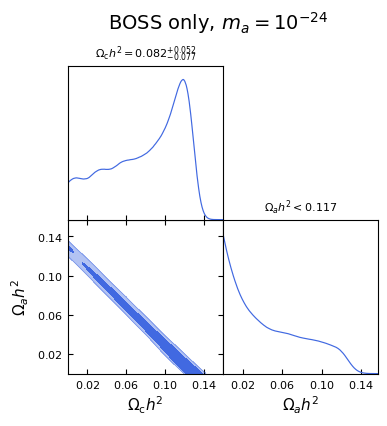

In [6]:
chain1 = load_samples('/home/fverdian/cobaya/chains/axclass_24_new/chain', to_getdist=True)
chain1.label=r'1'
# p=chain1.getParams()
# boss_fx.addDerived(p.omega_chi*93.14, name='M', label=r'Mnu', range=[0.,None])
print([pn.name for pn in chain1.paramNames.names])

# chain2 = load_samples('/home/fverdian/cobaya/chains/AxiCLASSasnu/chain', to_getdist=True)
# chain2.label=r'$m_a=10^{-26}$'
# print([pn.name for pn in boss_br.paramNames.names])

pars_toplot =['omega_cdm','omega_scf']
gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=15

gdplot.triangle_plot([chain1],  pars_toplot, contour_colors=['royalblue','k'], title_limit=2, filled=True)
# gdplot.finish_plot(no_tight=True)
gdplot.fig.text(0.5, 1.02, r'BOSS only, $m_a=10^{-24}$', ha='center', va='top', fontsize=14)


In [7]:
gdplot.fig.savefig('/home/fverdian/cobaya/chains/axclass_24_new.pdf', bbox_inches='tight')

Text(0.5, 1.02, 'BOSS only, fixed $k_J$')

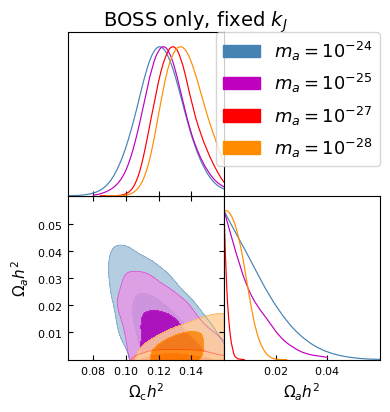

In [5]:
b1 = load_samples('/home/fverdian/cobaya/chains-ulysses/AxiCLASS_m24_wnu/chain', to_getdist=True)
b1.label=r'$m_a=10^{-24}$'

b2 = load_samples('/home/fverdian/cobaya/chains-ulysses/AxiCLASS_m25_wnu/chain', to_getdist=True)
b2.label=r'$m_a=10^{-25}$'

b3 = load_samples('/home/fverdian/cobaya/chains-ulysses/AxiCLASS_m27_wnu/chain', to_getdist=True)
b3.label=r'$m_a=10^{-27}$'

b4 = load_samples('/home/fverdian/cobaya/chains-ulysses/AxiCLASS_m28_wnu/chain', to_getdist=True)
b4.label=r'$m_a=10^{-28}$'

# boss_200 = load_samples('/home/fverdian/cobaya/chains-grids/bx_CMBpriors/base_kJ200/boss/base_kJ200_boss', to_getdist=True)
# boss_200.label=r'$k_J=200$'
# boss_200.setRanges({'omega_chi':[0.,0.02], 'omega_cdm':[0.115,0.16]})

chains_to_plot=[ b1,b2,b3,b4]
for ch in chains_to_plot:
    p=ch.getParams()
    # ch.addDerived(p.omega_chi*93.14, name='M', label=r'Mnu', range=[0.,None])
    # ch.addDerived(p.omega_chi/(p.omega_cdm+p.omega_b+p.omega_chi), name='fx', label=r'f_\chi', range=[0.,0.2])

pars_toplot =['omega_cdm','omega_scf']
gdplot = gdplt.get_subplot_plotter()
boss_full.label='CDM'
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=16

gdplot.triangle_plot(chains_to_plot ,  pars_toplot, title_limit=None, contour_colors=['steelblue','m', 'r','darkorange','k'],filled=True)
gdplot.fig.text(0.5, 1.02, r'BOSS only, fixed $k_J$', ha='center', va='top', fontsize=14)


$m_a=10^{-24}$ --> \Omega_{a} h^2 < 0.0334
$m_a=10^{-25}$ --> \Omega_{a} h^2 < 0.0259
$m_a=10^{-27}$ --> \Omega_{a} h^2 < 0.00323
$m_a=10^{-28}$ --> \Omega_{a} h^2 < 0.0125
[0.033419816, 0.025866104, 0.0032255023, 0.01246854]


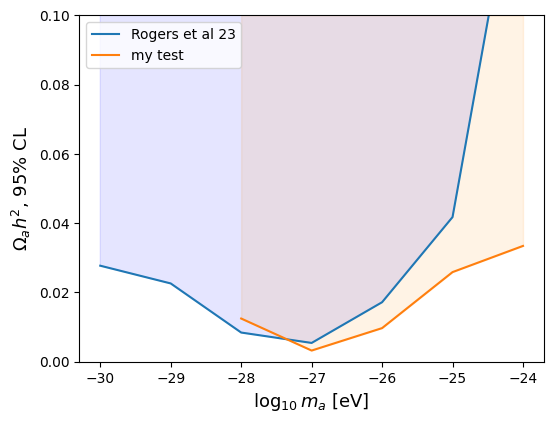

In [6]:
for samp in chains_to_plot:
    print(samp.label,'-->', samp.getInlineLatex('omega_scf',limit=2))

import matplotlib.pyplot as plt
mvals = [-24, -25, -26, -27, -28,-29, -30]
Rogers = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]

mvals2 = [-24, -25, -27, -28]
my2lims=[]
for samp in chains_to_plot:
    my2lims.append(samp.getMargeStats().parWithName('omega_scf').limits[1].upper)
plt.figure(figsize=(6,4.5))
plt.plot(mvals, Rogers, label='Rogers et al 23')
plt.fill_between(mvals, Rogers, y2=0.1, interpolate=True, color='b', alpha=0.1)

print(my2lims)
plt.plot([-24, -25,-26, -27, -28], [0.033419816, 0.025866104, 0.0097, 0.0032255023, 0.01246854], label='my test')
plt.fill_between([-24, -25,-26, -27, -28], [0.033419816, 0.025866104, 0.0097, 0.0032255023, 0.01246854], y2=0.1, interpolate=True, color='darkorange', alpha=0.1)

plt.ylim([0.,0.1])
plt.xlabel(r'$\log_{10} m_a$ [eV]', fontsize=13)
plt.ylabel(r'$\Omega_a h^2$, 95% CL', fontsize=13)
plt.legend()
plt.show()

---
plot boss Ivanov Phylcox

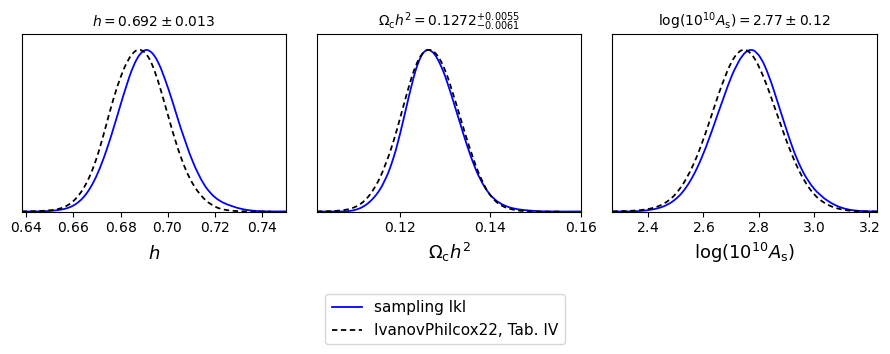

In [10]:
cosmolist=['h', 'omega_cdm', 'logA', 'n_s']
means=[0.688, 0.1268, 2.75,0.9649]
cov = np.diag(np.array([ 0.012, 0.0062, 0.12,0.0042])**2)

parlabels= ['h','\Omega_c h^2',  '\log{10^{10} A_s}', 'n_s']
ivphyl = getdist.MCSamples(samples = np.random.multivariate_normal(means, cov, 10000) ,
                        label='IvanovPhilcox22, Tab. IV',
                        names = cosmolist,
                        labels=parlabels,
                        ranges={'Mnu':[0.001,0.2],'Ombh2':[0.0216,None]})

gdplot = gdplt.get_subplot_plotter(subplot_size=3)
gdplot.settings.linewidth=1.5
gdplot.settings.subplot_size_ratio=0.95
gdplot.settings.figure_legend_loc='lower center'

gdplot.plots_1d([boss_b1, ivphyl],  pars_toplot, colors=['b','k'], nx=3,  title_limit=1, legend_ncol=1 ,ls=['-','--'])
gdplot.finish_plot()
# gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/pbjboss_ivphyl.pdf')


---
CMB

In [5]:

cmb1 = load_samples('/home/fverdian/cobaya/chains/planck_cosmopower/planck', to_getdist=True)
cmb1.label='cosmopower'
cmb_camb = load_samples('/home/fverdian/cobaya/chains-buone/planck_camb/planck', to_getdist=True)
cmb_camb.label='camb'
cmb_class = load_samples('/home/fverdian/cobaya/chains-buone/planck_class/planck', to_getdist=True)
cmb_class.label='Planck (CLASS)'
print([pn.name for pn in cmb_class.paramNames.names])


['logA', 'n_s', 'h', 'omega_b', 'omega_cdm', 'tau_reio', 'A_planck', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native']


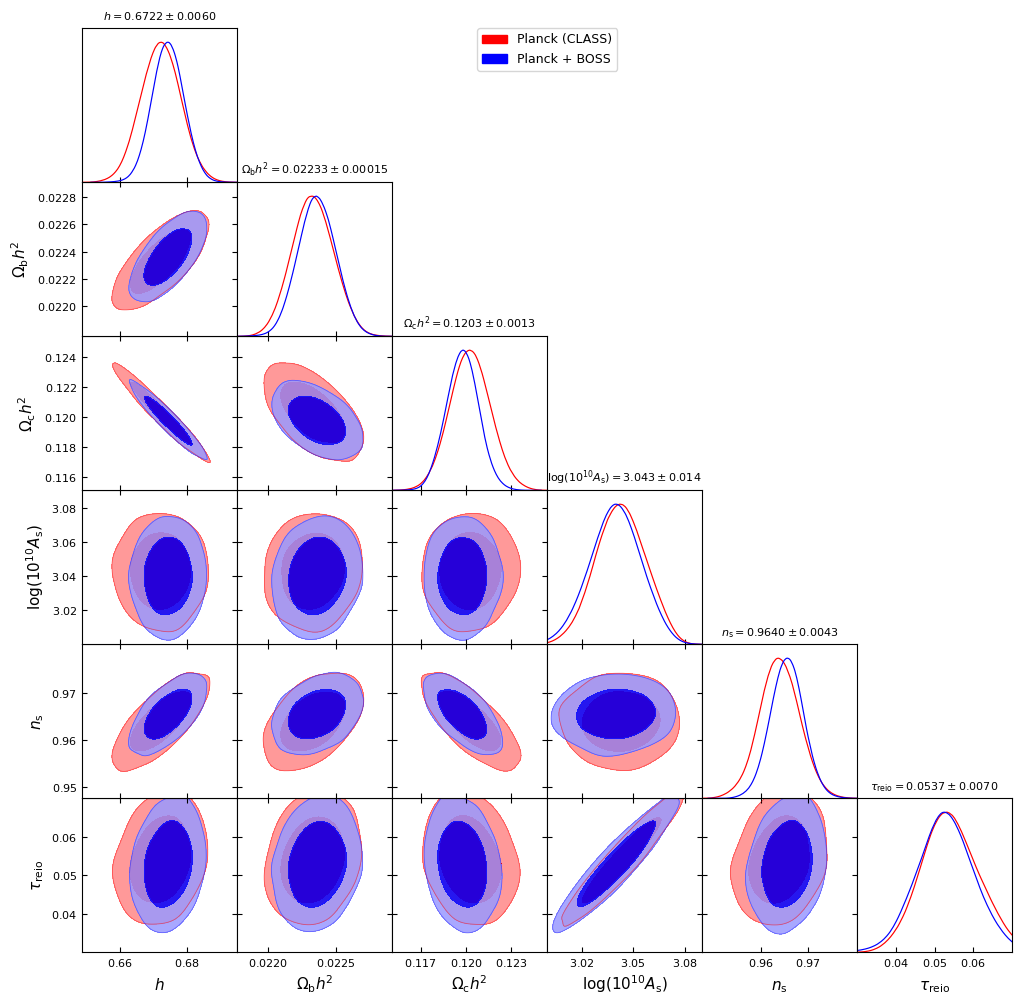

In [6]:
%matplotlib inline 
pars_toplot = ['h','omega_b','omega_cdm','logA', 'n_s', 'tau_reio']
gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.triangle_plot([cmb_class, boss_planck], pars_toplot, contour_colors=['r','b'],filled=True, title_limit=1)
